# PDE Approach

## European Call Option Pricing via the Black–Scholes PDE

The Black–Scholes Partial Differential Equation (PDE) governs the price \( V(S, t) \) of a European option and is given by:

$$
\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + r S\, \frac{\partial V}{\partial S} - r\, V = 0.
$$

where:
- \( S \) is the underlying asset price.
- \( t \) is time.
- \( \sigma \) is the volatility.
- \( r \) is the risk-free rate.
- \( V(S,t) \) is the option price.

## Terminal and Boundary Conditions

- **Terminal Condition:** At expiration \( (t = T) \), the payoff for a European call option is:

$$
V(S, T) = \max(S - K,\, 0)
$$

where \( K \) is the strike price.

- **Boundary Conditions:**
  - At \( S = 0 \): \( V(0, t) = 0 \) (a call option is worthless when the underlying asset is worthless).
  - At \( S = S_{\max} \) (a sufficiently high stock price): 

    $$
    V(S_{\max}, t) \approx S_{\max} - K\, e^{-r (T-t)}.
    $$

## Domain Discretization

We discretize the domains of \( S \) and \( t \) as follows:

- **Spatial Grid (Asset Price):**

$$
S_i = i\,\Delta S,\quad i = 0, 1, \dots, N, \quad \text{with} \quad \Delta S = \frac{S_{\max}}{N}.
$$

- **Time Grid:**

$$
t_j = j\,\Delta t, \quad j = 0, 1, \dots, M, \quad \text{with} \quad \Delta t = \frac{T}{M}.
$$

We denote the option price at grid point \((S_i, t_j)\) by \( V_i^j \).

## Finite Difference Approximations

We approximate the partial derivatives in the PDE using finite differences at the grid points.

1. **Time Derivative \( \frac{\partial V}{\partial t} \):**

   Using a **backward difference**:

   $$
   \frac{\partial V}{\partial t}\Big|_{(S_i, t_{j+1})} \approx \frac{V_i^j - V_i^{j+1}}{\Delta t}.
   $$

2. **First Spatial Derivative \( \frac{\partial V}{\partial S} \):**

   Using a **central difference**:

   $$
   \frac{\partial V}{\partial S}\Big|_{(S_i, t_{j+1})} \approx \frac{V_{i+1}^{j+1} - V_{i-1}^{j+1}}{2\,\Delta S}.
   $$

3. **Second Spatial Derivative \( \frac{\partial^2 V}{\partial S^2} \):**

   Also using a **central difference**:

   $$
   \frac{\partial^2 V}{\partial S^2}\Big|_{(S_i, t_{j+1})} \approx \frac{V_{i+1}^{j+1} - 2\,V_i^{j+1} + V_{i-1}^{j+1}}{(\Delta S)^2}.
   $$

## Substituting into the Black–Scholes PDE

Substitute the finite difference approximations into the Black–Scholes PDE evaluated at \((S_i, t_{j+1})\):

$$
\frac{V_i^j - V_i^{j+1}}{\Delta t} + \frac{1}{2}\sigma^2 S_i^2 \cdot \frac{V_{i+1}^{j+1} - 2\,V_i^{j+1} + V_{i-1}^{j+1}}{(\Delta S)^2} + r S_i\, \frac{V_{i+1}^{j+1} - V_{i-1}^{j+1}}{2\,\Delta S} - r\, V_i^{j+1} = 0.
$$

Multiply the entire equation by \( \Delta t \):

$$
V_i^j - V_i^{j+1} + \Delta t \left[ \frac{1}{2}\sigma^2 S_i^2 \cdot \frac{V_{i+1}^{j+1} - 2\,V_i^{j+1} + V_{i-1}^{j+1}}{(\Delta S)^2} + r S_i\, \frac{V_{i+1}^{j+1} - V_{i-1}^{j+1}}{2\,\Delta S} - r\, V_i^{j+1} \right] = 0.
$$

Rearrange to solve for \( V_i^j \):

$$
V_i^j = V_i^{j+1} - \Delta t \left[ \frac{1}{2}\sigma^2 S_i^2 \cdot \frac{V_{i+1}^{j+1} - 2\,V_i^{j+1} + V_{i-1}^{j+1}}{(\Delta S)^2} + r S_i\, \frac{V_{i+1}^{j+1} - V_{i-1}^{j+1}}{2\,\Delta S} - r\, V_i^{j+1} \right].
$$

This recurrence relation is used to update the option price **backwards in time** from the terminal condition at \( t = T \) down to \( t = 0 \).

## Summary

- **Set up the grid:** Discretize the asset price \( S \) and time \( t \) domains.
- **Apply terminal and boundary conditions:** Specify \( V(S, T) = \max(S-K, 0) \) and the necessary conditions at \( S = 0 \) and \( S = S_{\max} \).
- **Use finite differences:** Approximate the derivatives in the PDE using the formulas above.
- **Backward induction:** Compute \( V_i^j \) from \( j = M-1 \) down to \( 0 \) using the discretized equation.
- **Obtain the option price:** \( V(S_0, 0) \) (or via interpolation from the grid) gives the European call option price at the current asset price.

> **Note:** The explicit scheme is conditionally stable. Accurate results require careful choice of \(\Delta S\) and \(\Delta t\) or the use of an implicit or Crank–Nicolson scheme.



European Call Option Price via Explicit PDE: 10.4417


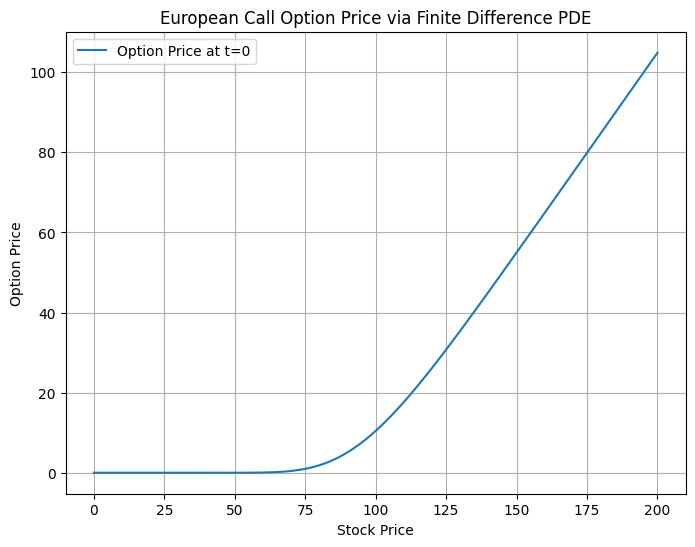

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Parameter Setup
# ---------------------------
S_max = 200.0      # maximum stock price to consider on the grid
T = 1.0            # time to expiry (in years)
N = 100            # number of stock price steps (spatial grid points)
M = 1000            # number of time steps

r = 0.05           # risk-free interest rate
sigma = 0.2        # volatility of the underlying asset
K = 100.0          # strike price

# Define step sizes
dS = S_max / N     # stock price increment
dt = T / M         # time increment

# ---------------------------
# 2. Grid Initialization
# ---------------------------
# grid[i, j] approximates the option price at S = i*dS and time t = j*dt.
grid = np.zeros((N+1, M+1))

# Stock price values corresponding to grid indices
S_vals = np.linspace(0, S_max, N+1)

# Terminal condition: at expiry (t = T), the option payoff is max(S-K, 0)
grid[:, -1] = np.maximum(S_vals - K, 0)

# Lower boundary: if S=0, a call option is worthless.
grid[0, :] = 0

# Upper boundary condition: for high S, the call option price approaches S - K*exp(-r*(T-t)).
# We use this to set the price at S_max for all times.
for j in range(M+1):
    t = j * dt
    grid[-1, j] = S_max - K * np.exp(-r * (T - t))

# ---------------------------
# 3. Finite Difference Backward Induction
# ---------------------------
# We use an explicit scheme to step backward from expiry (t = T) to t = 0.
# The Black-Scholes PDE is:
#   V_t + 0.5*sigma^2*S^2*V_SS + r*S*V_S - r*V = 0.
#
# Discretizations:
#   V_t ≈ (V[i, j] - V[i, j+1]) / dt      (backward difference in time)
#   V_S ≈ (V[i+1, j+1] - V[i-1, j+1]) / (2*dS)   (central difference)
#   V_SS ≈ (V[i+1, j+1] - 2*V[i, j+1] + V[i-1, j+1]) / (dS)^2   (central difference)
#
# Rearranging, we update V[i, j] as:
#   V[i, j] = V[i, j+1] + dt * (0.5 * sigma**2 * (S_i)**2 * V_SS +
#                               r* S_i * V_S - r* V[i, j+1])
for j in reversed(range(M)):
    for i in range(1, N):  # skip i=0 and i=N because of boundary conditions
        # Current stock price at grid node i
        S_i = i * dS
        
        # First derivative (Delta) using central difference at time j+1:
        delta = (grid[i+1, j+1] - grid[i-1, j+1]) / (2 * dS)
        
        # Second derivative (Gamma) using central difference at time j+1:
        gamma = (grid[i+1, j+1] - 2 * grid[i, j+1] + grid[i-1, j+1]) / (dS ** 2)
        
        # Explicit finite difference time-stepping:
        grid[i, j] = grid[i, j+1] + dt * (
            0.5 * sigma ** 2 * S_i ** 2 * gamma + 
            r * S_i * delta - 
            r * grid[i, j+1]
        )

# ---------------------------
# 4. Extracting and Plotting the Result
# ---------------------------
# To obtain the option price for a stock price of 100, we interpolate the grid at S=100.
price_at_100 = np.interp(100, S_vals, grid[:, 0])
print(f"European Call Option Price via Explicit PDE: {price_at_100:.4f}")

# Optional: plot the option price at time t=0 as function of stock price
plt.figure(figsize=(8, 6))
plt.plot(S_vals, grid[:, 0], label="Option Price at t=0")
plt.xlabel("Stock Price")
plt.ylabel("Option Price")
plt.title("European Call Option Price via Finite Difference PDE")
plt.legend()
plt.grid(True)
plt.show()


# MonteCarlo Approach

In [16]:
import numpy as np

# Parameters
S0, K, T, r, sigma, N_sim = 100, 100, 1, 0.05, 0.2, 100000

# Simulate stock paths
np.random.seed(42)
Z = np.random.normal(size=N_sim)
S_T = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

# Calculate option payoffs
payoffs = np.maximum(S_T - K, 0)
price = np.exp(-r * T) * np.mean(payoffs)

print(f"Monte Carlo Price Approximation: {price:.4f}")


Monte Carlo Price Approximation: 10.4739


# Black Scholes Formula

In [17]:
import math

def norm_cdf(x):
    """
    Standard normal cumulative distribution function.
    This uses the error function erf.
    """
    return (1 + math.erf(x / math.sqrt(2))) / 2

def black_scholes_call(S, K, T, r, sigma):
    """
    Prices a European call option using the Black-Scholes formula.
    
    Parameters:
        S     : Current underlying asset price
        K     : Strike price
        T     : Time to expiration (in years)
        r     : Risk-free interest rate (annualized)
        sigma : Volatility of the underlying asset (annualized)
    
    Returns:
        Price of the European call option.
    """
    # Calculate d1 and d2 according to the Black-Scholes formula
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    # Black-Scholes formula for call option price
    call_price = S * norm_cdf(d1) - K * math.exp(-r * T) * norm_cdf(d2)
    return call_price

def black_scholes_put(S, K, T, r, sigma):
    """
    Prices a European put option using the Black-Scholes formula.
    
    Parameters:
        S     : Current underlying asset price
        K     : Strike price
        T     : Time to expiration (in years)
        r     : Risk-free interest rate (annualized)
        sigma : Volatility of the underlying asset (annualized)
    
    Returns:
        Price of the European put option.
    """
    # Calculate d1 and d2 according to the Black-Scholes formula
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    # Black-Scholes formula for put option price (via put-call parity)
    put_price = K * math.exp(-r * T) * norm_cdf(-d2) - S * norm_cdf(-d1)
    return put_price

if __name__ == "__main__":
    # Example parameters
    S = 100.0    # Current stock price
    K = 100.0    # Strike price
    T = 1.0      # Time to expiration (in years)
    r = 0.05     # Annual risk-free interest rate (5%)
    sigma = 0.2  # Annual volatility (20%)

    # Compute the option prices
    call_price = black_scholes_call(S, K, T, r, sigma)
    put_price = black_scholes_put(S, K, T, r, sigma)
    
    print(f"European Call Option Price: {call_price:.4f}")
    print(f"European Put Option Price:  {put_price:.4f}")


European Call Option Price: 10.4506
European Put Option Price:  5.5735
